# Smart Movie Recommender System 🎥🍿

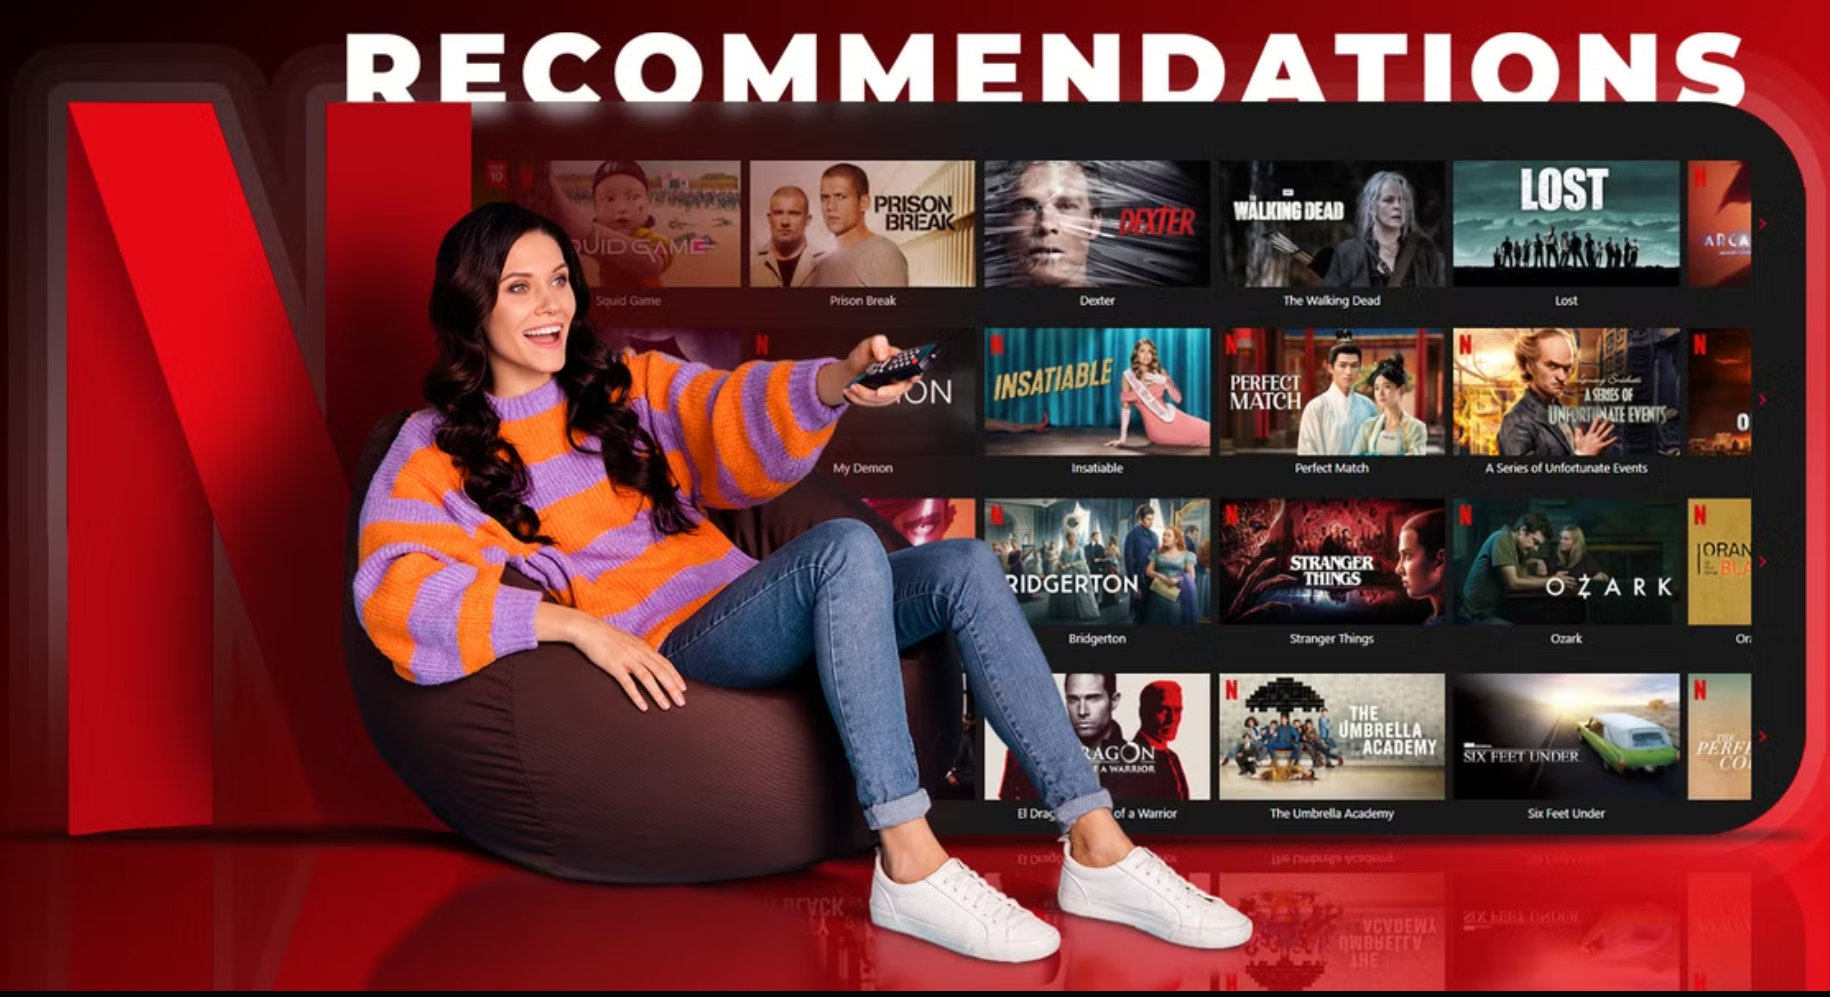

## Data Loading & Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
!unzip /content/ml-latest-small.zip

unzip:  cannot find or open /content/ml-latest-small.zip, /content/ml-latest-small.zip.zip or /content/ml-latest-small.zip.ZIP.


In [4]:
import os
os.listdir('/kaggle/input/')

['ml-latest-small']

In [5]:
import pandas as pd

movies  = pd.read_csv('/kaggle/input/ml-latest-small/ml-latest-small/movies.csv')
ratings = pd.read_csv('/kaggle/input/ml-latest-small/ml-latest-small/ratings.csv')
links   = pd.read_csv('/kaggle/input/ml-latest-small/ml-latest-small/links.csv')
tags    = pd.read_csv('/kaggle/input/ml-latest-small/ml-latest-small/tags.csv')

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Data Understanding & Preprocessing

### Explore Movies Data

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
movies.duplicated().sum()

0

##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

In [12]:
movies['title'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

#### Extract year from title

In [13]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')


In [14]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

In [15]:
movies['year'].dtype

dtype('float64')

In [16]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


#### Check number of users and average ratings for each one 

In [17]:
print(f"Number of unique users: {ratings['userId'].nunique()}")
print(f"Average number of ratings per user: {ratings.groupby('userId').size().mean():.2f}")

Number of unique users: 610
Average number of ratings per user: 165.30


#### geners column

In [18]:
movies['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [19]:
all_genres = movies['genres'].str.split('|').explode()
genre_counts = all_genres.value_counts()

print("Genres Values:")
print(genre_counts)


Genres Values:
genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


#### Check missing genres

In [20]:
missing_genres = movies[(movies['genres'].str.strip() == '') | (movies['genres'] == '(no genres listed)')]

print(f"length movies without Genres: {len(missing_genres)}")
print("-"*50)
missing_genres.head()

length movies without Genres: 34
--------------------------------------------------


,movieId,title,genres,year
8517,114335,La cravate (1957),(no genres listed),1957.0
8684,122888,Ben-hur (2016),(no genres listed),2016.0
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017.0
8782,129250,Superfast! (2015),(no genres listed),2015.0
8836,132084,Let It Be Me (1995),(no genres listed),1995.0


#### remove no genres movies

In [21]:
movies_cleaned = movies[~( (movies['genres'].str.strip() == '') | (movies['genres'] == '(no genres listed)'))]
movies_cleaned

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0


#### Some Insights for year column

In [22]:
print(f"First movie year: {int(movies['year'].min())}")
print(f"Latest movie year: {int(movies['year'].max())}")

First movie year: 1902
Latest movie year: 2018


In [23]:
year_counts = movies['year'].value_counts().dropna().sort_index()
top_years = year_counts.sort_values(ascending=False).head(20)
top_years

year
2002.0    311
2006.0    295
2001.0    294
2007.0    284
2000.0    283
2009.0    282
2004.0    279
2003.0    279
2014.0    278
1996.0    276
2015.0    274
2005.0    273
2008.0    269
1999.0    263
1997.0    260
1995.0    259
1998.0    258
2011.0    254
2010.0    247
2013.0    239
Name: count, dtype: int64

##### 📊🔍**Insight**: 
Most active year: 2002 with 311 movies

### Plot top 20 years by movie count

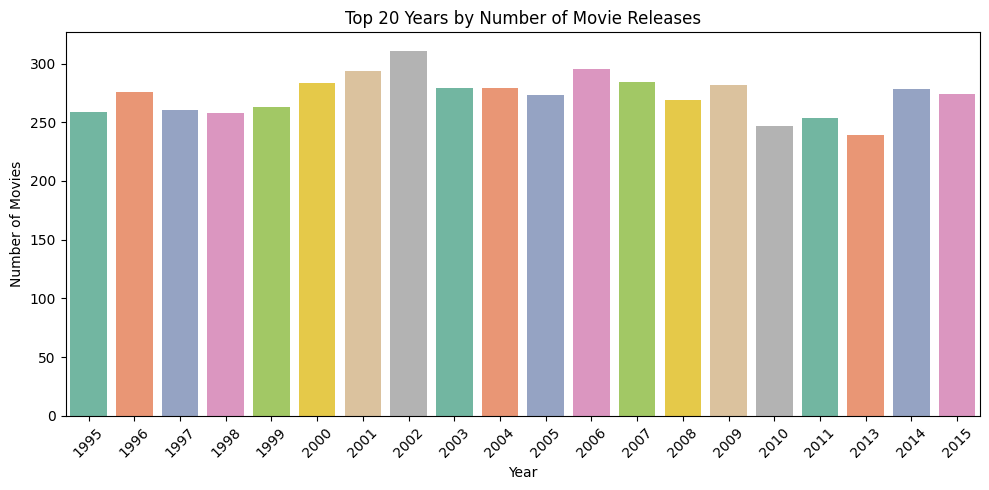

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_years.index.astype(int), y=top_years.values, palette='Set2')
plt.title('Top 20 Years by Number of Movie Releases')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Explore ratings Data

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [26]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [27]:
ratings.duplicated().sum()

0

##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

In [28]:
print(f"Number of unique users: {ratings['userId'].nunique()}")
print(f"Number of unique movies: {ratings['movieId'].nunique()}")

Number of unique users: 610
Number of unique movies: 9724


#### Explore rating column

In [29]:
print(f"Average rating: {ratings['rating'].mean():.2f}")
print(f"Minimum rating: {ratings['rating'].min()}")
print(f"Maximum rating: {ratings['rating'].max()}")

Average rating: 3.50
Minimum rating: 0.5
Maximum rating: 5.0


### Explore tags Data

In [30]:
print(tags.info())
print("-"*50)
print(tags.isna().sum())
print("-"*50)
print(tags.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None
--------------------------------------------------
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
--------------------------------------------------
0


##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

### Explore links Data

In [31]:
print(links.info())
print("-"*50)
print(links.isna().sum())
print("-"*50)
print(links.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
--------------------------------------------------
movieId    0
imdbId     0
tmdbId     8
dtype: int64
--------------------------------------------------
0


##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

### Data Processing

In [32]:
data = ratings.merge(movies_cleaned)
data.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0


#### EDA

In [33]:
all_genres = data['genres'].str.split('|').explode()
top_genres = all_genres.value_counts().head(20)

px.bar(top_genres, title="Top 10 Genres (Individual)", labels={"value": "Count", "index": "Genre"})

In [34]:
data['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [35]:
data['rating'].value_counts()

rating
4.0    26810
3.0    20041
5.0    13204
3.5    13130
4.5     8543
2.0     7549
2.5     5544
1.0     2809
1.5     1791
0.5     1368
Name: count, dtype: int64

#### Check Most rating

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Rating Distribution')

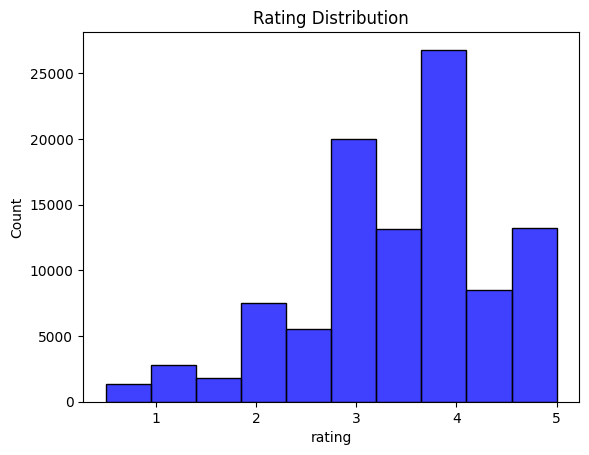

In [36]:
sns.histplot(data['rating'], bins=10,color='blue')
plt.title('Rating Distribution')

##### 📊🔍**Insight**:
- The most ratings is 4

#### Check Most Rated Movie

In [37]:
top_movies = data['title'].value_counts().head(10)
px.bar(top_movies, title="Top 10 Most Rated Movies")

##### 📊🔍**Insight**:
- The most rating movie is Forrest Gump (1994)

In [38]:
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'year'], dtype='object')

#### Check most genres

In [39]:
top_genres = data['genres'].value_counts().head(10)
px.bar(top_genres, title="Top 10 genres")

### 📊🔍**Insight**:
- The most genres is Comedy

## Model Training

In [40]:
# !pip install --no-cache-dir --force-reinstall numpy==1.23.5 scipy==1.9.3


In [41]:
# !pip install scikit-surprise

In [42]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import RandomizedSearchCV

###  Factorization Machines

In [43]:
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

#### SVD

In [44]:
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)


In [45]:
# Evaluate
acc=accuracy.rmse(predictions)


RMSE: 0.8708


#### SVD with RandomizedSearch

In [46]:
params = {
    'n_factors': [20, 50, 100, 150],
    'lr_all': [0.001, 0.003, 0.005, 0.007, 0.01],
    'reg_all': [0.01, 0.02, 0.05, 0.1, 0.2]
}

# Random search
rs = RandomizedSearchCV(SVD, params, n_iter=50, 
                        measures=['rmse'], cv=3, n_jobs=-1, random_state=42)
rs.fit(data_surprise)

# Best results
print(" Best RMSE:", rs.best_score['rmse'])
print(" Best Params:", rs.best_params['rmse'])

 Best RMSE: 0.8680943564219641
 Best Params: {'n_factors': 150, 'lr_all': 0.01, 'reg_all': 0.05}


### Improvement ⚒️

##### SVD after Filteing data

In [47]:
user_counts = data['userId'].value_counts()
active_users = user_counts[user_counts >= 5].index
data_filtered = data[data['userId'].isin(active_users)]


In [48]:
movie_counts = data_filtered['movieId'].value_counts()
popular_movies = movie_counts[movie_counts >= 5].index
data_filtered = data_filtered[data_filtered['movieId'].isin(popular_movies)]

In [49]:
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise_filtered = Dataset.load_from_df(data_filtered[['userId', 'movieId', 'rating']], reader)


In [50]:
trainset, testset = train_test_split(data_surprise_filtered, test_size=0.2, random_state=42)


In [51]:

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
accuracy.rmse(predictions)


RMSE: 0.8603


0.8602932933113655

In [52]:
params = {
    'n_factors': [20, 50, 100, 150],
    'lr_all': [0.001, 0.003, 0.005, 0.007, 0.01],
    'reg_all': [0.01, 0.02, 0.05, 0.1, 0.2]
}

# Random search
rs = RandomizedSearchCV(SVD, params, n_iter=30, 
                        measures=['rmse'], cv=5, n_jobs=-1, random_state=42)
rs.fit(data_surprise_filtered)

# Best results
print(" Best RMSE:", rs.best_score['rmse'])
print(" Best Params:", rs.best_params['rmse'])

 Best RMSE: 0.8433871826832972
 Best Params: {'n_factors': 150, 'lr_all': 0.01, 'reg_all': 0.05}


In [79]:
rmse_svd=rs.best_score['rmse']

In [53]:
best_model = rs.best_estimator['rmse']
trainset = data_surprise.build_full_trainset()
best_model.fit(trainset)

In [54]:
import joblib

joblib.dump(best_model, 'best_svd_model.pkl')

['best_svd_model.pkl']

#### Get recomendation

In [55]:
def get_recommendations(user_id, n=5):
    all_movie_ids = data['movieId'].unique()
    user_movies = data[data['userId'] == user_id]['movieId'].unique()

    recommendations = []
    for movie_id in all_movie_ids:
        if movie_id not in user_movies:
            predicted_rating = best_model.predict(user_id, movie_id).est
            recommendations.append((movie_id, predicted_rating))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n]


In [56]:
get_recommendations(1, n=10)

[(318, 5.0),
 (48516, 5.0),
 (77455, 5.0),
 (109487, 5.0),
 (912, 5.0),
 (1086, 5.0),
 (1250, 5.0),
 (3508, 5.0),
 (750, 5.0),
 (1246, 5.0)]

#### Get recommended movie titles

In [57]:
def get_top_n_movie_titles(user_id, movies_df, n=10):
    top_n = get_recommendations(user_id, n)
    results = []
    for movie_id, score in top_n:
        title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
        results.append((title, round(score, 2)))
    return pd.DataFrame(results, columns=['Movie Title', 'Predicted Rating'])


get_top_n_movie_titles(user_id=1, movies_df=movies, n=10)


,Movie Title,Predicted Rating
0,"Shawshank Redemption, The (1994)",5.0
1,"Departed, The (2006)",5.0
2,Exit Through the Gift Shop (2010),5.0
3,Interstellar (2014),5.0
4,Casablanca (1942),5.0
5,Dial M for Murder (1954),5.0
6,"Bridge on the River Kwai, The (1957)",5.0
7,"Outlaw Josey Wales, The (1976)",5.0
8,Dr. Strangelove or: How I Learned to Stop Worr...,5.0
9,Dead Poets Society (1989),5.0


#### SVDpp

In [58]:
from surprise import SVDpp
from surprise.model_selection import train_test_split, cross_validate

In [59]:

svdpp_model = SVDpp()
svdpp_model.fit(trainset)


RMSE: 0.6900
SVDpp RMSE: 0.6900


In [82]:
# Predict and evaluate
predictions = svdpp_model.test(testset)
rmse_svdpp = accuracy.rmse(predictions)
print(f"SVDpp RMSE: {rmse_svdpp:.4f}")


RMSE: 0.6900
SVDpp RMSE: 0.6900


In [60]:
joblib.dump(svdpp_model, 'svdpp_model.pkl')

['svdpp_model.pkl']

#### Get recommended movie titles By SVDpp

In [84]:
def get_recommendations_svdpp(user_id, n=5):
    all_movie_ids = data['movieId'].unique()
    user_movies = data[data['userId'] == user_id]['movieId'].unique()

    recommendations = []
    for movie_id in all_movie_ids:
        if movie_id not in user_movies:
            predicted_rating = svdpp_model.predict(user_id, movie_id).est
            recommendations.append((movie_id, predicted_rating))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n]

In [85]:
def get_top_n_movie_titles_svdpp(user_id, movies_df, n=10):
    top_n = get_recommendations_svdpp(user_id, n)
    results = []
    for movie_id, score in top_n:
        title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
        results.append((title, round(score, 2)))
    return pd.DataFrame(results, columns=['Movie Title', 'Predicted Rating'])


get_top_n_movie_titles_svdpp(user_id=1, movies_df=movies, n=10)

,Movie Title,Predicted Rating
0,"Shawshank Redemption, The (1994)",5.0
1,Whiplash (2014),5.0
2,Wallace & Gromit: The Best of Aardman Animatio...,5.0
3,Patton (1970),5.0
4,"Philadelphia Story, The (1940)",5.0
5,Singin' in the Rain (1952),5.0
6,Rear Window (1954),5.0
7,North by Northwest (1959),5.0
8,Some Like It Hot (1959),5.0
9,Casablanca (1942),5.0


#### Neural Collaborative Filtering

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [71]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error

2025-06-17 13:37:47.283038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750167467.546664      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750167467.617941      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [64]:
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

data_filtered['user_idx'] = user_encoder.fit_transform(data_filtered['userId'])
data_filtered['movie_idx'] = movie_encoder.fit_transform(data_filtered['movieId'])

In [65]:
X = data_filtered[['user_idx', 'movie_idx']]
y = data_filtered['rating']

# Normalize ratings to [0, 1] for neural net stability
y_normalized = (y - 0.5) / 4.5

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_normalized, test_size=0.2, random_state=42
)

num_users = data_filtered['user_idx'].nunique()
num_items = data_filtered['movie_idx'].nunique()


In [72]:
def build_ncf_model(num_users, num_items, n_factors=100):
    user_input = Input(shape=(1,))
    item_input = Input(shape=(1,))

    user_emb = Embedding(num_users, n_factors)(user_input)
    item_emb = Embedding(num_items, n_factors)(item_input)

    user_vec = Flatten()(user_emb)
    item_vec = Flatten()(item_emb)

    x = Concatenate()([user_vec, item_vec])
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(1)(x)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
    return model

model = build_ncf_model(num_users, num_items)


2025-06-17 13:38:09.906494: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [74]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    [X_train['user_idx'], X_train['movie_idx']], y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1131 - mae: 0.2530 - val_loss: 0.0372 - val_mae: 0.1488 - learning_rate: 0.0010
Epoch 2/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0355 - mae: 0.1454 - val_loss: 0.0362 - val_mae: 0.1464 - learning_rate: 0.0010
Epoch 3/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0324 - mae: 0.1386 - val_loss: 0.0358 - val_mae: 0.1452 - learning_rate: 0.0010
Epoch 4/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0297 - mae: 0.1321 - val_loss: 0.0363 - val_mae: 0.1458 - learning_rate: 0.0010
Epoch 5/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0260 - mae: 0.1231 - val_loss: 0.0373 - val_mae: 0.1475 - learning_rate: 0.0010
Epoch 6/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0218 - mae: 0.1126 - val_loss: 0.0374 - val_mae: 0.1479 - learning_rate: 5.0000e-04


In [80]:
y_pred = model.predict([X_test['user_idx'], X_test['movie_idx']], verbose=0)

# Reverse normalization
y_pred_rescaled = y_pred * 4.5 + 0.5
y_test_rescaled = y_test * 4.5 + 0.5

NCF_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"NCF RMSE: {rmse:.4f}")

NCF RMSE: 0.8534


In [78]:
joblib.dump(model, 'NCF_model.pkl')

['NCF_model.pkl']

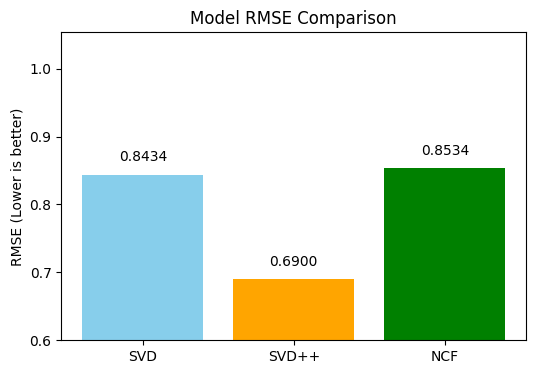

In [83]:
model_names = ['SVD', 'SVD++', 'NCF']
rmse_values = [rmse_svd, rmse_svdpp, NCF_rmse]

plt.figure(figsize=(6, 4))
plt.bar(model_names, rmse_values, color=['skyblue', 'orange', 'green'])
plt.ylabel('RMSE (Lower is better)')
plt.title('Model RMSE Comparison')
plt.ylim(0.6, max(rmse_values) + 0.2)
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
plt.show()

##### 📊🔍**Insight**:
SVD++ achieved the lowest RMSE, indicating it predicts user ratings more accurately than both standard SVD and Neural CF.

This is likely because SVD++ enhances SVD by including implicit feedback, such as whether a user interacted with a movie, even if they didn’t rate it — which captures more user preference patterns.

### Item Similarity 

In [86]:
item_user_matrix = ratings.pivot_table(index='movieId', columns='userId', values='rating').fillna(0)


In [87]:
from sklearn.metrics.pairwise import cosine_similarity


item_similarity_matrix = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity_matrix,
                                  index=item_user_matrix.index,
                                  columns=item_user_matrix.index)

In [88]:
item_similarity_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
def get_top_n_similar_items(selected_item_id, top_n=10):
    if selected_item_id not in item_similarity_df.index:
        return pd.DataFrame({'error': ['Item ID not found.']})
    
    similar_items = item_similarity_df[selected_item_id].sort_values(ascending=False)[1:top_n+1]
    result = movies[movies['movieId'].isin(similar_items.index)].copy()
    result['similarity'] = similar_items.values
    return result[['movieId', 'title', 'similarity']]

In [90]:
get_top_n_similar_items(selected_item_id=1, top_n=5)


,movieId,title,similarity
224,260,Star Wars: Episode IV - A New Hope (1977),0.572601
314,356,Forrest Gump (1994),0.565637
418,480,Jurassic Park (1993),0.564262
615,780,Independence Day (a.k.a. ID4) (1996),0.557388
2355,3114,Toy Story 2 (1999),0.547096


In [91]:
def get_top_n_similar_items_by_title(title, top_n=10):
   
    movie_row = movies[movies['title'].str.lower() == title.lower()]
    
    if movie_row.empty:
        return pd.DataFrame({'error': ['Title not found.']})
    
    movie_id = movie_row['movieId'].values[0]

    
    similar_items = item_similarity_df[movie_id].sort_values(ascending=False)[1:top_n+1]
    
    result = movies[movies['movieId'].isin(similar_items.index)].copy()
    result['similarity'] = similar_items.values
    return result[['movieId', 'title', 'similarity']]

In [92]:
get_top_n_similar_items_by_title("Toy Story (1995)", top_n=5)

,movieId,title,similarity
224,260,Star Wars: Episode IV - A New Hope (1977),0.572601
314,356,Forrest Gump (1994),0.565637
418,480,Jurassic Park (1993),0.564262
615,780,Independence Day (a.k.a. ID4) (1996),0.557388
2355,3114,Toy Story 2 (1999),0.547096
